# In this tutorial, learned

 - How to transform string type data into date type, refer to the date parse document
 - How to parse the date type data
 - How to deal with date inconsistance within one column
 - How to deal with time-series data
 - How to write function to parse the column

# Get our environment set up
________

The first thing we'll need to do is load in the libraries and datasets we'll be using. For today, we'll be working with two datasets: one containing information on earthquakes that occured between 1965 and 2016, and another that contains information on landslides that occured between 2007 and 2016.


In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [2]:
# read in our data
earthquakes = pd.read_csv("earthquake-database.csv")
landslides = pd.read_csv("catalog.csv")
volcanos = pd.read_csv("volcanic-eruptions.csv")

# set seed for reproducibility
np.random.seed(0)

# Check the data type of our date column
___

For this part of the challenge, I'll be working with the `date` column from the `landslides` dataframe. The very first thing I'm going to do is take a peek at the first few rows to make sure it actually looks like it contains dates.

In [3]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


Yep, those are dates! But just because I, a human, can tell that these are dates doesn't mean that Python knows that they're dates. Notice that the at the bottom of the output of `head()`, you can see that it says that the data type of this  column is "object". 

> Pandas uses the "object" dtype for storing various types of data types, but most often when you see a column with the dtype "object" it will have strings in it. 

If you check the pandas dtype documentation [here](http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes), you'll notice that there's also a specific `datetime64` dtypes. Because the dtype of our column is `object` rather than `datetime64`, we can tell that Python doesn't know that this column contains dates.

We can also look at just the dtype of your column without printing the first few rows if we like:

In [5]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

In [11]:
# Your turn! Check the data type of the Date column in the earthquakes dataframe
# (note the capital 'D' in date!)
volcanos['Date'].dtype

dtype('O')

# Convert our date columns to datetime
___

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it *is* recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

We can pandas what the format of our dates are with a guide called as ["strftime directive", which you can find more information on at this link](http://strftime.org/). The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are [lots of possible parts of a date](http://strftime.org/), but the most common are `%d` for day, `%m` for month, `%y` for a two-digit year and `%Y` for a four digit year.

Some examples:

 * 1/17/07 has the format "%m/%d/%y"
 * 17-1-2007 has the format "%d-%m-%Y"
 
 Looking back up at the head of the `date` column in the landslides dataset, we can see that it's in the format "month/day/two-digit year", so we can use the same syntax as the first example to parse in our dates: 

In [24]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

In [31]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,date_parsed
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,2007-03-02
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,2007-03-22
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,2007-04-06
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,2007-04-14
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,2007-04-15


In [25]:

landslides['date_parsed'].head()# print the first few rows

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [27]:
landslides['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [26]:
earthquakes['Date'].head()

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object

In [32]:
# Your turn! Create a new column, date_parsed, in the earthquakes
# dataset that has correctly parsed dates in it. (Don't forget to double-check that the dtype is correct!)
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format = "%m/%d/%Y")

ValueError: time data '1975-02-23T02:58:41.000Z' does not match format '%m/%d/%Y' (match)

oops, notice a data inconsistance problem
https://www.kaggle.com/usgs/earthquake-database/discussion/28469

Now, let's find the problem and solve this issue

In [21]:
earthquakes['Date'].dtype

dtype('O')

In [35]:
earthquakes[earthquakes['Date'] =='1975-02-23T02:58:41.000Z']

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed


Notice that there is a date type is different than other data date type mm/dd/yyyy

In [47]:
earthquakes[earthquakes.Date.str.len() !=10]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [59]:
earthquakes[earthquakes.Date.str.len() !=10].loc[:,'Date'] = pd.to_datetime(earthquakes[earthquakes.Date.str.len() !=10]['Date'], format = "%Y-%m-%dT%H:%M:%S.%fZ")

C:\Users\yuanq\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [58]:
earthquakes[earthquakes.Date.str.len() !=10]['Date']

3378     1975-02-23T02:58:41.000Z
7512     1985-04-28T02:53:41.530Z
20650    2011-03-13T02:23:34.520Z
Name: Date, dtype: object

In [ ]:
#Pandas make new column form string slice of another column

In [61]:
earthquakes[earthquakes.Date.str.len() !=10]['Date'].str[:-1]

3378     1975-02-23T02:58:41.000
7512     1985-04-28T02:53:41.530
20650    2011-03-13T02:23:34.520
Name: Date, dtype: object

In [62]:
pd.to_datetime(earthquakes[earthquakes.Date.str.len() !=10]['Date'].str[:-1], format = "%Y-%m-%dT%H:%M:%S.%f")

3378    1975-02-23 02:58:41.000
7512    1985-04-28 02:53:41.530
20650   2011-03-13 02:23:34.520
Name: Date, dtype: datetime64[ns]

In [73]:
# for those date formate are “yyyy-MM-dd'T'HH:mm:ss.SSSZ”
#first, get right format like drop last character
#then, Convert timestamps of “yyyy-MM-dd'T'HH:mm:ss.SSSZ” format in Python
earthquakes.loc[earthquakes.Date.str.len() !=10,'date_parsed'] = pd.to_datetime(earthquakes[earthquakes.Date.str.len() !=10]['Date'].str[:-1], format = "%Y-%m-%dT%H:%M:%S.%f")

In [74]:
#for those date formate are "MM-dd-yyyy"
earthquakes.loc[earthquakes.Date.str.len() ==10,'date_parsed'] = pd.to_datetime(earthquakes[earthquakes.Date.str.len() ==10]['Date'], format = "%m/%d/%Y")

### Or

In [15]:
# earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format = True) # time data '1975-02-23T02:58:41.000Z' does not match format '%m/%d/%Y' (match)

In [16]:
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'])

In [17]:
earthquakes['date_parsed'].head()

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: date_parsed, dtype: datetime64[ns]

In [ ]:
# earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format = "%m/%d/%Y", errors = 'coerce')

### Important! 

- The data format might not clean in the whole column, even if the beginning or the end of the data is clean: process the dirty data using different methods
- Find out the issue using data length or data pattern https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.len.html
- how to slice the string
- apply proper date formate [pandas make new column from string slice of another column](https://stackoverflow.com/questions/25789445/pandas-make-new-column-from-string-slice-of-another-column)
- use loc to slice the dataframe
- [Convert timestamps of “yyyy-MM-dd'T'HH:mm:ss.SSSZ” format in Python](https://stackoverflow.com/questions/17494250/convert-timestamps-of-yyyy-mm-ddthhmmss-sssz-format-in-python/17494618#17494618)

In [76]:
#Now, let's check the date parse
earthquakes['date_parsed'].head()

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: date_parsed, dtype: datetime64[ns]

# Select just the day of the month from our column
___

"Ok, Rachael," you may be saying at this point, "This messing around with data types is fine, I guess, but what's the *point*?" To answer your question, let's try to get information on the day of the month that a landslide occured on from the original "date" column, which has an "object" dtype: 

In [77]:
# try to get the day of the month from the date column
day_of_month_landslides = landslides['date'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

We got an error! The important part to look at here is the part at the very end that says `AttributeError: Can only use .dt accessor with datetimelike values`. We're getting this error because the dt.day() function doesn't know how to deal with a column with the dtype "object". Even though our dataframe has dates in it, because they haven't been parsed we can't interact with them in a useful way.

Luckily, we have a column that we parsed earlier , and that lets us get the day of the month out no problem:

In [78]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day

In [80]:
month_landslides = landslides['date_parsed'].dt.month

In [81]:
month_landslides.head()

0    3.0
1    3.0
2    4.0
3    4.0
4    4.0
Name: date_parsed, dtype: float64

# Plot the day of the month to check the date parsing
___

One of the biggest dangers in parsing dates is mixing up the months and days. The to_datetime() function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense. 

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

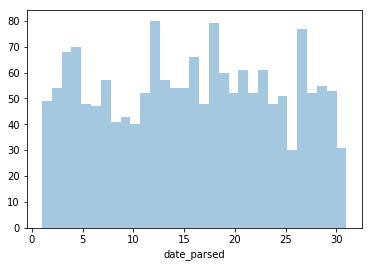

In [83]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

In [85]:
# Your turn! Plot the days of the month from your
# earthquake dataset and make sure they make sense.
day_earthquakes = earthquakes['date_parsed'].dt.day
month_earthquakes = earthquakes['date_parsed'].dt.month

In [ ]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

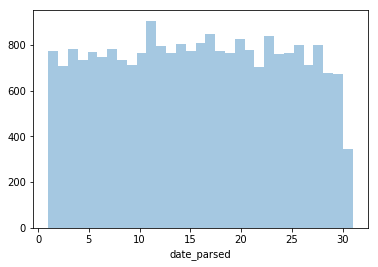

In [90]:
# plot the day of the month
sns.distplot(day_earthquakes, kde=False, bins=31)

### Extral Exercise

In [14]:
volcanos.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


This column contains a mixture of text ("Unknown") and years both before the common era (BCE, also known as BC) and in the common era (CE, also known as AD).

In [3]:
volcanos['Last Known Eruption'].sample(5)

764     Unknown
1069    1996 CE
34      1855 CE
489     2016 CE
9       1302 CE
Name: Last Known Eruption, dtype: object

In [4]:
volcanos['Last Known Eruption'].value_counts()

Unknown     637
2016 CE      68
2015 CE      21
2014 CE      14
2012 CE      13
2008 CE      12
2013 CE      10
2011 CE       9
2009 CE       9
2007 CE       9
1996 CE       8
2000 CE       8
50 BCE        8
2010 CE       8
1550 CE       7
1993 CE       6
1350 CE       6
1952 CE       6
1995 CE       6
2002 CE       6
1977 CE       6
1957 CE       6
950 CE        6
1050 BCE      5
1880 CE       5
1960 CE       5
2006 CE       5
1979 CE       5
1974 CE       5
1820 CE       5
           ... 
3450 BCE      1
1302 CE       1
1980 CE       1
1600 BCE      1
1950 BCE      1
778 BCE       1
1790 BCE      1
1872 CE       1
3740 BCE      1
2950 BCE      1
1857 CE       1
5060 BCE      1
130 BCE       1
1450 CE       1
1916 CE       1
1964 CE       1
6200 BCE      1
1793 CE       1
5250 BCE      1
1877 CE       1
1963 CE       1
1900 CE       1
1894 CE       1
260 CE        1
160 CE        1
837 CE        1
2460 BCE      1
1882 CE       1
2990 BCE      1
1631 CE       1
Name: Last Known Eruptio

In [5]:
import re
import numpy as np
def parse_year_volcanos(string_year):
    if string_year == "Unknown":
        return np.NaN
    else:
        year =  int(re.search(r'\d+', string_year).group())
        if string_year[-3:] == 'BCE':
            year = year * -1
        return year

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DA9FE80>]], dtype=object)

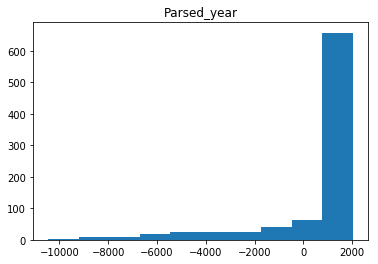

In [6]:
volcanos['Parsed_year']  =  volcanos['Last Known Eruption'].apply(parse_year_volcanos)
volcanos.hist(column='Parsed_year', grid=False)